Cost function in pure Python</br>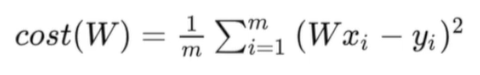

In [ ]:
import numpy as np

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  c = 0
  for i in range(len(X)):
    c += (W * X[i] - Y[i]) ** 2
  return c / len(X)

# W * X[i]는 내가 세운 가설 즉, 예측값을 의미하고 Y[i]는 실제값을 의미한다.
# c += (W * X[i] - Y[i]) ** 2는 예측값 - 실제값의 제곱을 누적한 것이다.
# c / len(X)은 오차의 제곱의 평균을 구하는 것이다.



In [ ]:
for feed_W in np.linspace(-3, 5, num=15):
  curr_cost = cost_func(feed_W, X, Y)
  print('{:6.3f} | {:10.5f}'.format(feed_W, curr_cost))

# 값이 커졌다가 작아지는 모습을 볼 수 있음

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


Cost function in TensorFlow

In [ ]:
import tensorflow as tf

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))

# tf.square(hypothesis - y) 는 예측값 - 실제값의 제곱한 것
# tf.reduce_mean(tf.square(hypothesis - y))은 오차의 평균을 구한 것


In [ ]:
W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
  curr_cost = cost_func(feed_W, X, Y)
  cost_values.append(curr_cost)
  print('{:6.3f} | {:10.5f}'.format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


Gradient descent</br>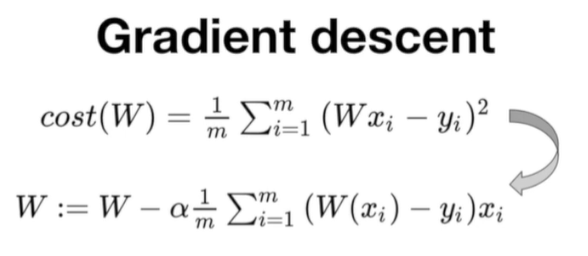

In [ ]:
tf.random.set_seed(0)

X_data = [1., 2., 3., 4.]
Y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal([1], -100, 100))

for step in range(300):
  hypothesis = W * X
  cost = tf.reduce_mean(tf.square(hypothesis - Y))

  alpha = 0.01
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
  descent = W - tf.multiply(alpha, gradient)
  W.assign(descent)

  if step % 10 == 0:
    print('{:5} | {:10.4f} | {:10.6f}'.format(step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046


In [ ]:
_